In [151]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the weights
Theta1 = np.array([[1, -1, 0.5, 1], [2, -2, 1, -1]])
Theta2 = np.array([[-1, 2, 1]])

# Define the input data
X1 = np.array([1, 0, 3, -1])  # i. (0, 3 − 1)
X2 = np.array([1, 1, 2, 1])  # ii. (1, 2, 1)
X3 = np.array([1, -1, 1, 2]) # iii. (-1, 1, 2)

# Perform forward propagation
A1 = sigmoid(np.dot(X1, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (0, 3 - 1):", A2)  # Output for i.

A1 = sigmoid(np.dot(X2, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (1, 2, 1):", A2)  # Output for ii.

A1 = sigmoid(np.dot(X3, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (-1, 1, 2):", A2)  # Output for iii.

Output for input (0, 3 - 1): [0.83653594]
Output for input (1, 2, 1): [0.8164761]
Output for input (-1, 1, 2): [0.87331584]


In [152]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def forward_propagation(inputs, weights):
    # Add bias node (x0 = 1) to the inputs
    # inputs = np.insert(inputs, 0, 1)
    
    # Calculate the activations of the hidden layer
    hidden_activations = sigmoid(np.dot(weights[0], inputs))
    
    # Add bias node (x0 = 1) to the hidden activations
    hidden_activations = np.insert(hidden_activations, 0, 1)
    
    # Calculate the output of the neural network
    output = sigmoid(np.dot(weights[1], hidden_activations))
    
    return hidden_activations, output

def backpropagation(inputs, targets, weights, learning_rate):
    # Perform forward propagation to get the hidden activations and output
    hidden_activations, output = forward_propagation(inputs, weights)
    
    # Calculate the error at the output layer
    output_error = output - targets
    
    # Calculate the error at the hidden layer
    hidden_error = np.dot(weights[1].T, output_error) * sigmoid_derivative(hidden_activations)
    
    # Update the weights at the hidden-output layer
    weights[1] = weights[1].astype('float64')
    weights[1] -= learning_rate * np.outer(output_error, hidden_activations)
    
    # Update the weights at the input-hidden layer
    weights[0] = weights[0].astype('float64')
    weights[0] -= learning_rate * np.outer(hidden_error[1:], inputs)
    
    
    return weights

# Define the initial weights
weights = [
    np.array([[1, -1, 0.5, 1], [2, -2, 1, -1]]),  # Θ(1)
    np.array([[-1, 2, 1]])  # Θ(2)
]

# Define the input data and targets
training_data = [
    (np.array([1, 0, 3, -1]), 0),   # (0, 3, -1) with target 0
    (np.array([1, 1, 2, 1]), 1),    # (1, 2, 1) with target 1
    (np.array([1, -1, 1, 2]), 0)    # (-1, 1, 2) with target 0
]

# Set the learning rate
learning_rate = 0.1

# Perform backpropagation for each training data point
for inputs, target in training_data:
    weights = backpropagation(inputs, target, weights, learning_rate)

print("Final weights:", weights)



# Set the formatting options
np.set_printoptions(precision=8, suppress=True)

# Print the final weights
print("Final weights:")
for i, w in enumerate(weights):
    print(f"  Θ({i+1}):")
    print(w)


Final weights: [array([[ 0.9407633 , -0.95792579,  0.37885989,  0.97897811],
       [ 1.97215758, -1.97941383,  0.94383033, -1.01089152]]), array([[-1.14617615,  1.86678996,  0.85156159]])]
Final weights:
  Θ(1):
[[ 0.9407633  -0.95792579  0.37885989  0.97897811]
 [ 1.97215758 -1.97941383  0.94383033 -1.01089152]]
  Θ(2):
[[-1.14617615  1.86678996  0.85156159]]


In [153]:
import numpy as np
import pandas as pd
import math
from PIL import Image
import operator
import matplotlib.pyplot as plt
import random
from collections import OrderedDict

In [154]:
# a)
def func_x(x):
    ans = ((x**2)*math.sin(2*math.pi*x)) + 0.7
    return ans

In [155]:
# b)
x1 = random.uniform(0,1)
x2 = random.uniform(0,1)

if (func_x(x1)>x2):
    Class=0
else:
    Class=1

print("x1: ",x1)
print("x2: ",x2)
print("f(x1): ",func_x(x1))
print("Class: ",Class)


x1:  0.8812192850334261
x2:  0.7561640591257395
f(x1):  0.17276898787922546
Class:  1


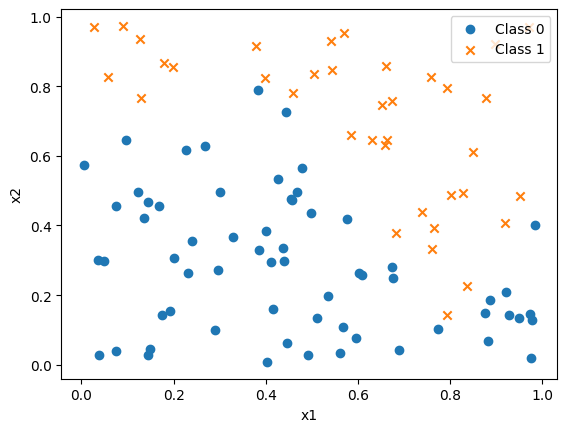

In [156]:
# c)
import math
import random
import matplotlib.pyplot as plt


points = []
for i in range(100):
    x1 = random.uniform(0,1)
    x2 = random.uniform(0,1)
    if func_x(x1) > x2:
        points.append((x1, x2, 0))
    else:
        points.append((x1, x2, 1))

# Combine points into a single array of tuples
points_arr = np.array(points)

class_0_points = [(x, y) for x, y, c in points if c == 0]
class_1_points = [(x, y) for x, y, c in points if c == 1]

plt.scatter(*zip(*class_0_points), marker='o', label='Class 0')
plt.scatter(*zip(*class_1_points), marker='x', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Q3

In [157]:
# a)
def weight(curr, next_nodes):
    return np.random.uniform(low = -0.3, high = 0.3, size=(next_nodes, curr))
    #return np.random.rand(next_nodes,curr)

def weights_list(l_nodes):
    W = []
    for i in range(len(l_nodes) - 1):
        temp = weight(l_nodes[i] + 1, l_nodes[i+1])
        W.append(temp)
    return W

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nodes = [2,3,1]
weights = weights_list(nodes)
weights

[array([[-0.24909096,  0.02626479,  0.02194302],
        [ 0.16579554,  0.28077804, -0.11715244],
        [-0.27132968,  0.07131641,  0.23054109]]),
 array([[-0.18550043, -0.25568049, -0.271391  , -0.14864153]])]

In [158]:
#b)
def forward_prop(x,w):
    z=w @ x
    a=sigmoid(z)
    return a

def full_forward_prop(w,x1,x2):
    a=[]
    a_t=[]
    l1=np.array([1,x1,x2])
    a.append(l1)
    for i in range(len(w)):
        a_temp=(forward_prop(a[i],w[i]))
        if (i !=(len(w)-1)):
            a_temp=np.insert(a_temp,0,1)
        a.append(a_temp)
    return a

activation=full_forward_prop(weights,points_arr[1][0],points_arr[1][1])

activation

[array([1.        , 0.40237721, 0.00832639]),
 array([1.        , 0.4406955 , 0.56900648, 0.4401104 ]),
 array([0.37331544])]

In [159]:
# # Get input values for the point we want to compute the activation for
#c)
x1, x2, target = points_arr[1]

# Compute final activation for the point
final_activation = full_forward_prop(weights, x1, x2)[-1][-1]

# Compute error delta at the final layer
error_delta = final_activation - target

print("Error delta at the final layer:", error_delta)


Error delta at the final layer: 0.37331543606217044


In [160]:
#d)
def error_calc(w, a, prev_e):
    e = np. delete((np.transpose(w) * (prev_e) * ((a) @ (1-a))),0,0)
    return e 

def errors(a,w,y,p):
    e = [] 
    f_e = p-y
    e.append(f_e)
    for i in range(len(w)-1):
        curr_w = w[len(w)-1-i]
        curr_a = a[i+1]
        pre_e = e[i]
        temp_e = error_calc(curr_w, curr_a, pre_e)
        e.append(temp_e)
    return e

err = errors(activation, weights, 0, final_activation)
err



[0.37331543606217044,
 array([[-0.07045453],
        [-0.07478367],
        [-0.04095921]])]

In [161]:
#e)
def small_delta(d, a, e):
    d = d + (e * np.transpose(a))
    return d

def s_gradient(delt ,act ,er):
    s_g = []
    for i in range(len(er)):
        t_d = delt[i]
        t_a = act[i]
        t_e = er[len(er)-1-i]
        t2_d = small_delta(t_d, t_a, t_e)
        s_g.append(t2_d)
    return s_g

def delta_matrix(w):
    d = []
    for i in range(len(w)):
        temp_w = w[i]
        row = len(temp_w)
        col = len(temp_w[0])
        d.append(np.zeros((row,col)))
    return d

delta_g = delta_matrix(weights)

d_g = s_gradient(delta_g, activation, err)
d_g

[array([[-0.07045453, -0.0283493 , -0.00058663],
        [-0.07478367, -0.03009124, -0.00062268],
        [-0.04095921, -0.01648105, -0.00034104]]),
 array([[0.37331544, 0.16451843, 0.2124189 , 0.16430001]])]

In [162]:
#f)

def update_weight(w,grad, alpha):
    new_w = []
    for i in range(len(w)):
        temp_w = w[i]
        temp_grad = grad[i]
        n_w = temp_w - (alpha * temp_grad)
        new_w.append(n_w)
        
    return new_w

new_weights = update_weight(weights, d_g,0.1)
new_weights

[array([[-0.24204551,  0.02909972,  0.02200168],
        [ 0.1732739 ,  0.28378716, -0.11709017],
        [-0.26723376,  0.07296452,  0.2305752 ]]),
 array([[-0.22283197, -0.27213233, -0.29263289, -0.16507153]])]

In [163]:
#g)

def output(x1,x2,w):
    a = full_forward_prop(w, x1, x2)
    
    return a[len(a)-1]

def prediction(h):
    if( h >= 0.5):
        return 1
    else:
        return 0

def cost_funct(data, w, lamda):
    sum = 0 
    n = len(data)
    matrix =np.zeros((2,2))
    
    for i in range(n):
        
        #actual output
        y = data[i][2]
        
        #predicted output
        h = output(data[i][0],data[i][1],w)
        
        pred = prediction(h)
        
        #add to confusion matrix
        if(y == 0):
            if (pred == y):
                pred_c = matrix[0][0] + 1
                matrix[0][0] = pred_c
            else:
                pred_c2 = matrix[1][0] + 1
                matrix[1][0] = pred_c2
        else:
            if (pred == y):
                pred_c = matrix[1][1] + 1
                matrix[1][1] = pred_c
            else:
                pred_c2 = matrix[0][1] + 1
                matrix[0][1] = pred_c2
                
        #add to sum
        sum = sum + (y * math.log(h)) + ((1 - y) * math.log(1-h))
        
    sum = (sum / n) * -1
    
    return sum, matrix

training_error, training_matrix = cost_funct(points_arr, new_weights,1)
print('Error on training data:', '\n', training_error, '\n')
print('Error Confusion matrix:', '\n',training_matrix)

Error on training data: 
 0.6604178171495656 

Error Confusion matrix: 
 [[63. 37.]
 [ 0.  0.]]


In [164]:
#h)

def data_generator_v(n):
    
    data = np.zeros((n,3))
   
    for i in range(n):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        data[i][0] = x
        data[i][1] = y
        if(func_x(x) > y):
            data[i][2] = 0
        else:
            data[i][2] = 1
    
    return data

validation_data = data_generator_v(100)

error_validation, validation_matrix = cost_funct(validation_data, new_weights,1)
print('validation error:', error_validation,'\n')
print('validation confusion matrix:','\n', validation_matrix)

validation error: 0.7018377121225288 

validation confusion matrix: 
 [[56. 44.]
 [ 0.  0.]]


In [165]:
#i)
#Added one extra node to hidden layer
nodes = [2,4,1]
weights = weights_list(nodes)


training_error, training_matrix = cost_funct(points_arr, new_weights,1)
print('Error on training data:', '\n', training_error, '\n')
print('Error Confusion matrix:', '\n',training_matrix)

error_validation, validation_matrix = cost_funct(validation_data, new_weights,1)
print('validation error:', error_validation,'\n')
print('validation confusion matrix:','\n', validation_matrix)

Error on training data: 
 0.6604178171495656 

Error Confusion matrix: 
 [[63. 37.]
 [ 0.  0.]]
validation error: 0.7018377121225288 

validation confusion matrix: 
 [[56. 44.]
 [ 0.  0.]]


In [166]:

#Added two extra node to hidden layer
nodes = [2,5,1]
weights = weights_list(nodes)


training_error, training_matrix = cost_funct(points_arr, weights,1)
print('Error on training data:', '\n', training_error, '\n')
print('Error Confusion matrix:', '\n',training_matrix)

error_validation, validation_matrix = cost_funct(validation_data, weights,1)
print('validation error:', error_validation,'\n')
print('validation confusion matrix:','\n', validation_matrix)

Error on training data: 
 0.6621556436975777 

Error Confusion matrix: 
 [[63. 37.]
 [ 0.  0.]]
validation error: 0.6840065654723526 

validation confusion matrix: 
 [[56. 44.]
 [ 0.  0.]]


In [167]:
#Added one extra node to first hidden layer and added one extra hidden layer
nodes = [2,4,2,1]
weights = weights_list(nodes)

training_error, training_matrix = cost_funct(points_arr, weights,1)
print('Error on training data:', '\n', training_error, '\n')
print('Error Confusion matrix:', '\n',training_matrix)

error_validation, validation_matrix = cost_funct(validation_data, weights,1)
print('validation error:', error_validation,'\n')
print('validation confusion matrix:','\n', validation_matrix)

Error on training data: 
 0.6690898636334852 

Error Confusion matrix: 
 [[63. 37.]
 [ 0.  0.]]
validation error: 0.6859096039105046 

validation confusion matrix: 
 [[56. 44.]
 [ 0.  0.]]


In [168]:
#j)
testing_data = data_generator_v(100)

error_testing, testing_matrix = cost_funct(testing_data, new_weights,1)
print('validation error:', error_testing,'\n')
print('validation confusion matrix:','\n', testing_matrix)

validation error: 0.7610285982924647 

validation confusion matrix: 
 [[46. 54.]
 [ 0.  0.]]
